In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import librosa
import librosa.display

sys.path.append(
    "/Users/oscarjimenezbou/Library/Mobile Documents/com~apple~CloudDocs/Documents/University_projects/TDS"
)

In [2]:
from scipy.io import wavfile
from utils import cut_signal_frames, plot_signal_with_frames

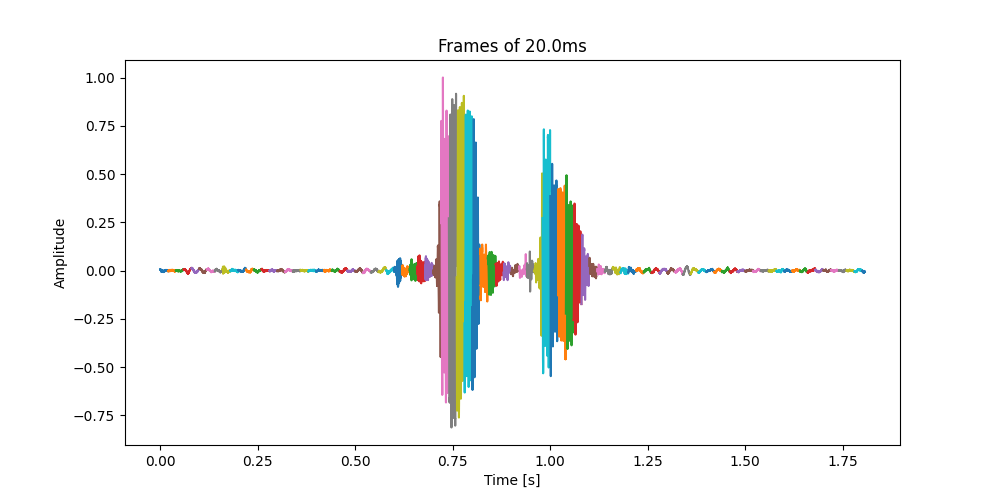

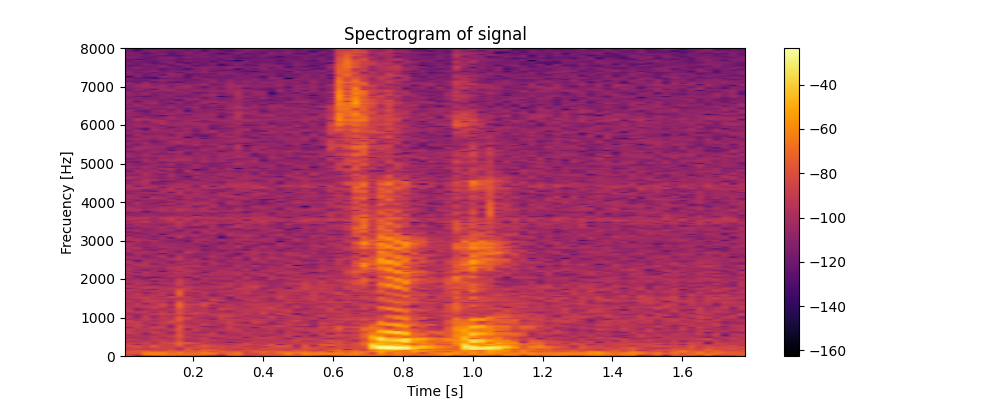

In [3]:

%matplotlib widget
siete_fn = "siete.wav"
frecuencia_señal, señal = wavfile.read(siete_fn)

tiempo_señal_siete = 1/frecuencia_señal * np.arange(len(señal))

señal = señal / np.max(np.abs(señal)) #normalise

frames_siete = cut_signal_frames(
    señal, frecuencia_señal, tiempo_frames=0.02)
    
plot_signal_with_frames(frames_siete, frecuencia_señal,
                        tiempo_señal_siete, tiempo_frames=0.02)

# Spectrogram
plt.figure(figsize=(10, 4))
f, t, Sxx, imagen = plt.specgram(
    señal, NFFT=512, Fs=frecuencia_señal, cmap='inferno')
plt.colorbar()
plt.xlabel('Time [s]')
plt.ylabel('Frecuency [Hz]')
plt.title('Spectrogram of signal')
plt.show()

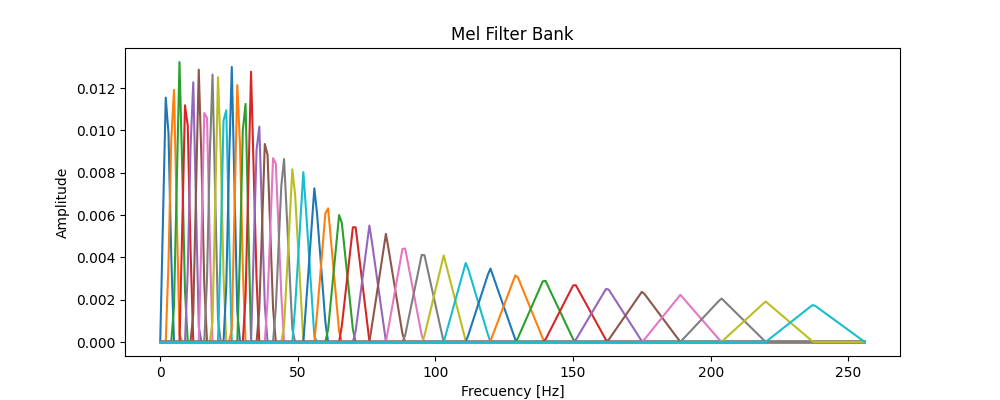

In [4]:
mel_filter = librosa.filters.mel(
    sr=frecuencia_señal, n_fft=512, n_mels=40)  # with 40 mel filters

# Graficar el banco de filtros Mel
plt.figure(figsize=(10, 4))
for n in range(mel_filter.shape[0]):
    plt.plot(mel_filter[n])

plt.title('Mel Filter Bank')
plt.xlabel('Frecuency [Hz]')
plt.ylabel('Amplitude')
plt.show()

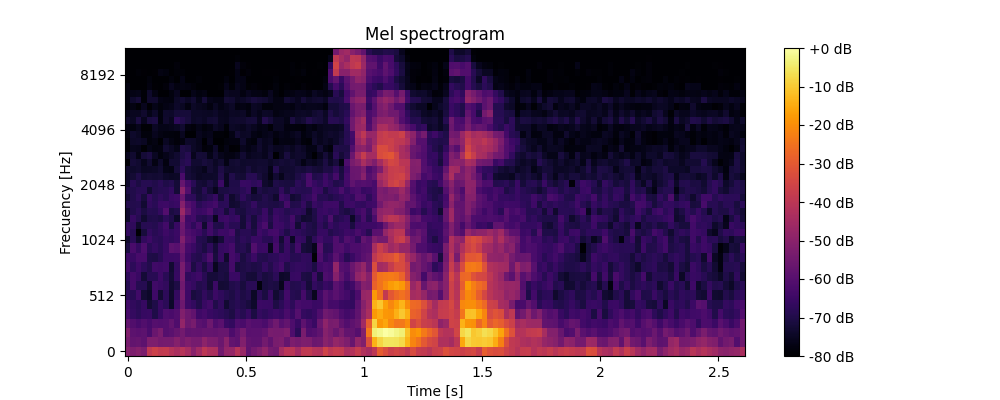

In [5]:
# do the mel spectrogram
mel_spectrogram = librosa.feature.melspectrogram(
    y=señal, sr=frecuencia_señal, n_fft=512, hop_length=256, n_mels=40)

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(
    mel_spectrogram, ref=np.max), y_axis='mel', x_axis='time', cmap='inferno')
plt.colorbar(format='%+2.0f dB')
plt.ylabel('Frecuency [Hz]')
plt.xlabel('Time [s]')
plt.title('Mel spectrogram')
plt.show()